In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from deap import tools, algorithms

from preprocessing import preprocess_data
from ga_setup import setup_toolbox, setup_stats
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, simulate_best_possible_strategy

In [3]:
df = pd.read_csv("./data/wig_d.csv", sep=";")
stock_data, ta_features = preprocess_data(df)
pd.concat([stock_data, ta_features],axis=1)

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_ao,momentum_roc,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,others_dr
100,0.010527,0.031441,0.851364,0.624558,0.826936,0.917721,0.323555,0.103410,0.517615,0.437511,...,0.509427,0.490347,0.500803,0.657449,0.722794,0.674967,0.379144,0.512771,0.260686,0.684075
101,0.002279,0.019927,0.751935,0.530293,0.752476,0.885183,0.240457,0.103784,0.438157,0.314479,...,0.358861,0.000000,0.373029,0.656395,0.627237,0.629350,0.351974,0.496543,0.232126,0.458212
102,0.000000,0.000000,0.679218,0.419615,0.768138,0.861612,0.127972,0.095694,0.329905,0.314479,...,0.329090,0.074605,0.186604,0.650855,0.550415,0.564764,0.403653,0.497833,0.326124,0.507809
103,0.003144,0.015671,0.632797,0.479370,0.821784,0.865538,0.149417,0.089844,0.400408,0.336827,...,0.365943,0.132242,0.066984,0.647970,0.563763,0.536547,0.408170,0.500112,0.331433,0.728995
104,0.005926,0.030882,0.613277,0.517987,0.823636,0.864841,0.159557,0.084945,0.415658,0.347800,...,0.440715,0.160540,0.120610,0.637317,0.523617,0.528576,0.408150,0.501930,0.328958,0.706859


In [4]:
# for col in ta_features.columns:
#     plt.plot(ta_features[col])
#     plt.title(col)
#     plt.show()

In [5]:
toolbox = setup_toolbox(stock_data, ta_features)
stats = setup_stats()
hof = tools.HallOfFame(1)
population = toolbox.population(n=50)

In [6]:
final_population = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, halloffame=hof, stats=stats, verbose=True)

gen	nevals	avg            	std           	min           	max            
0  	100   	[1102.16817057]	[190.42353779]	[410.04132238]	[1644.23179552]
1  	44    	[1281.02079353]	[181.08271791]	[562.95515966]	[1644.23179552]
2  	62    	[1335.74901906]	[221.11978409]	[729.10923871]	[1807.80066405]
3  	54    	[1457.46249703]	[261.06568588]	[725.04711755]	[2126.2826099] 
4  	62    	[1471.8414214] 	[334.96242902]	[710.37484738]	[2126.2826099] 
5  	53    	[1588.80394137]	[336.52825053]	[849.65123817]	[2126.2826099] 
6  	67    	[1680.908864]  	[391.61858]   	[835.43159424]	[2126.2826099] 
7  	55    	[1974.64499188]	[302.42437476]	[982.78891296]	[2126.2826099] 
8  	44    	[2025.12030814]	[262.29341933]	[991.07983952]	[2126.2826099] 
9  	63    	[2010.80751569]	[268.01168686]	[1113.00344477]	[2126.2826099] 
10 	58    	[2013.02605845]	[282.9298371] 	[1035.25880614]	[2126.2826099] 
11 	65    	[1994.16739319]	[284.80216215]	[1063.55623595]	[2185.2968818] 
12 	57    	[2033.16032832]	[260.800991]  	[906.7

In [7]:
best_strategy = hof[0]
pd.DataFrame(zip(ta_features.columns, best_strategy), columns=["feature", "weight"])

,feature,buy strategy weight,sell strategy weight
0,volume_adi,0.112423,0.901027
1,volume_obv,0.011076,0.272386
2,volume_cmf,-0.126277,-0.210296
3,volume_fi,-0.740321,-0.486893
4,volume_em,0.310289,0.027142
...,...,...,...
57,momentum_ppo_hist,0.983375,-0.960150
58,momentum_pvo,-0.658318,0.497147
59,momentum_pvo_signal,0.591770,-0.604277
60,momentum_pvo_hist,-0.281756,0.693018


In [8]:
print_strategy(stock_data, ta_features, best_strategy)

      DATE:   2011-09-12        ACTION:          buy          OPEN:     37969.75         MONEY:            0        SHARES:  0.026336754    COMMISSION:          2.5
      DATE:   2014-11-17        ACTION:         sell          OPEN:     53085.42         MONEY:  1398.097696        SHARES:            0    COMMISSION:  5.995244240
      DATE:   2016-01-08        ACTION:          buy          OPEN:     44373.03         MONEY:            0        SHARES:  0.031507825    COMMISSION:  9.490488480
      DATE:   2017-09-26        ACTION:         sell          OPEN:     63918.62         MONEY:  2013.936739        SHARES:            0    COMMISSION:  14.52533033
      DATE:   2020-03-13        ACTION:          buy          OPEN:     37770.04         MONEY:            0        SHARES:  0.053321011    COMMISSION:  19.56017217
      DATE:   2020-03-16        ACTION:         sell          OPEN:     38031.23         MONEY:  2027.863654        SHARES:            0    COMMISSION:  24.62983131
      DATE

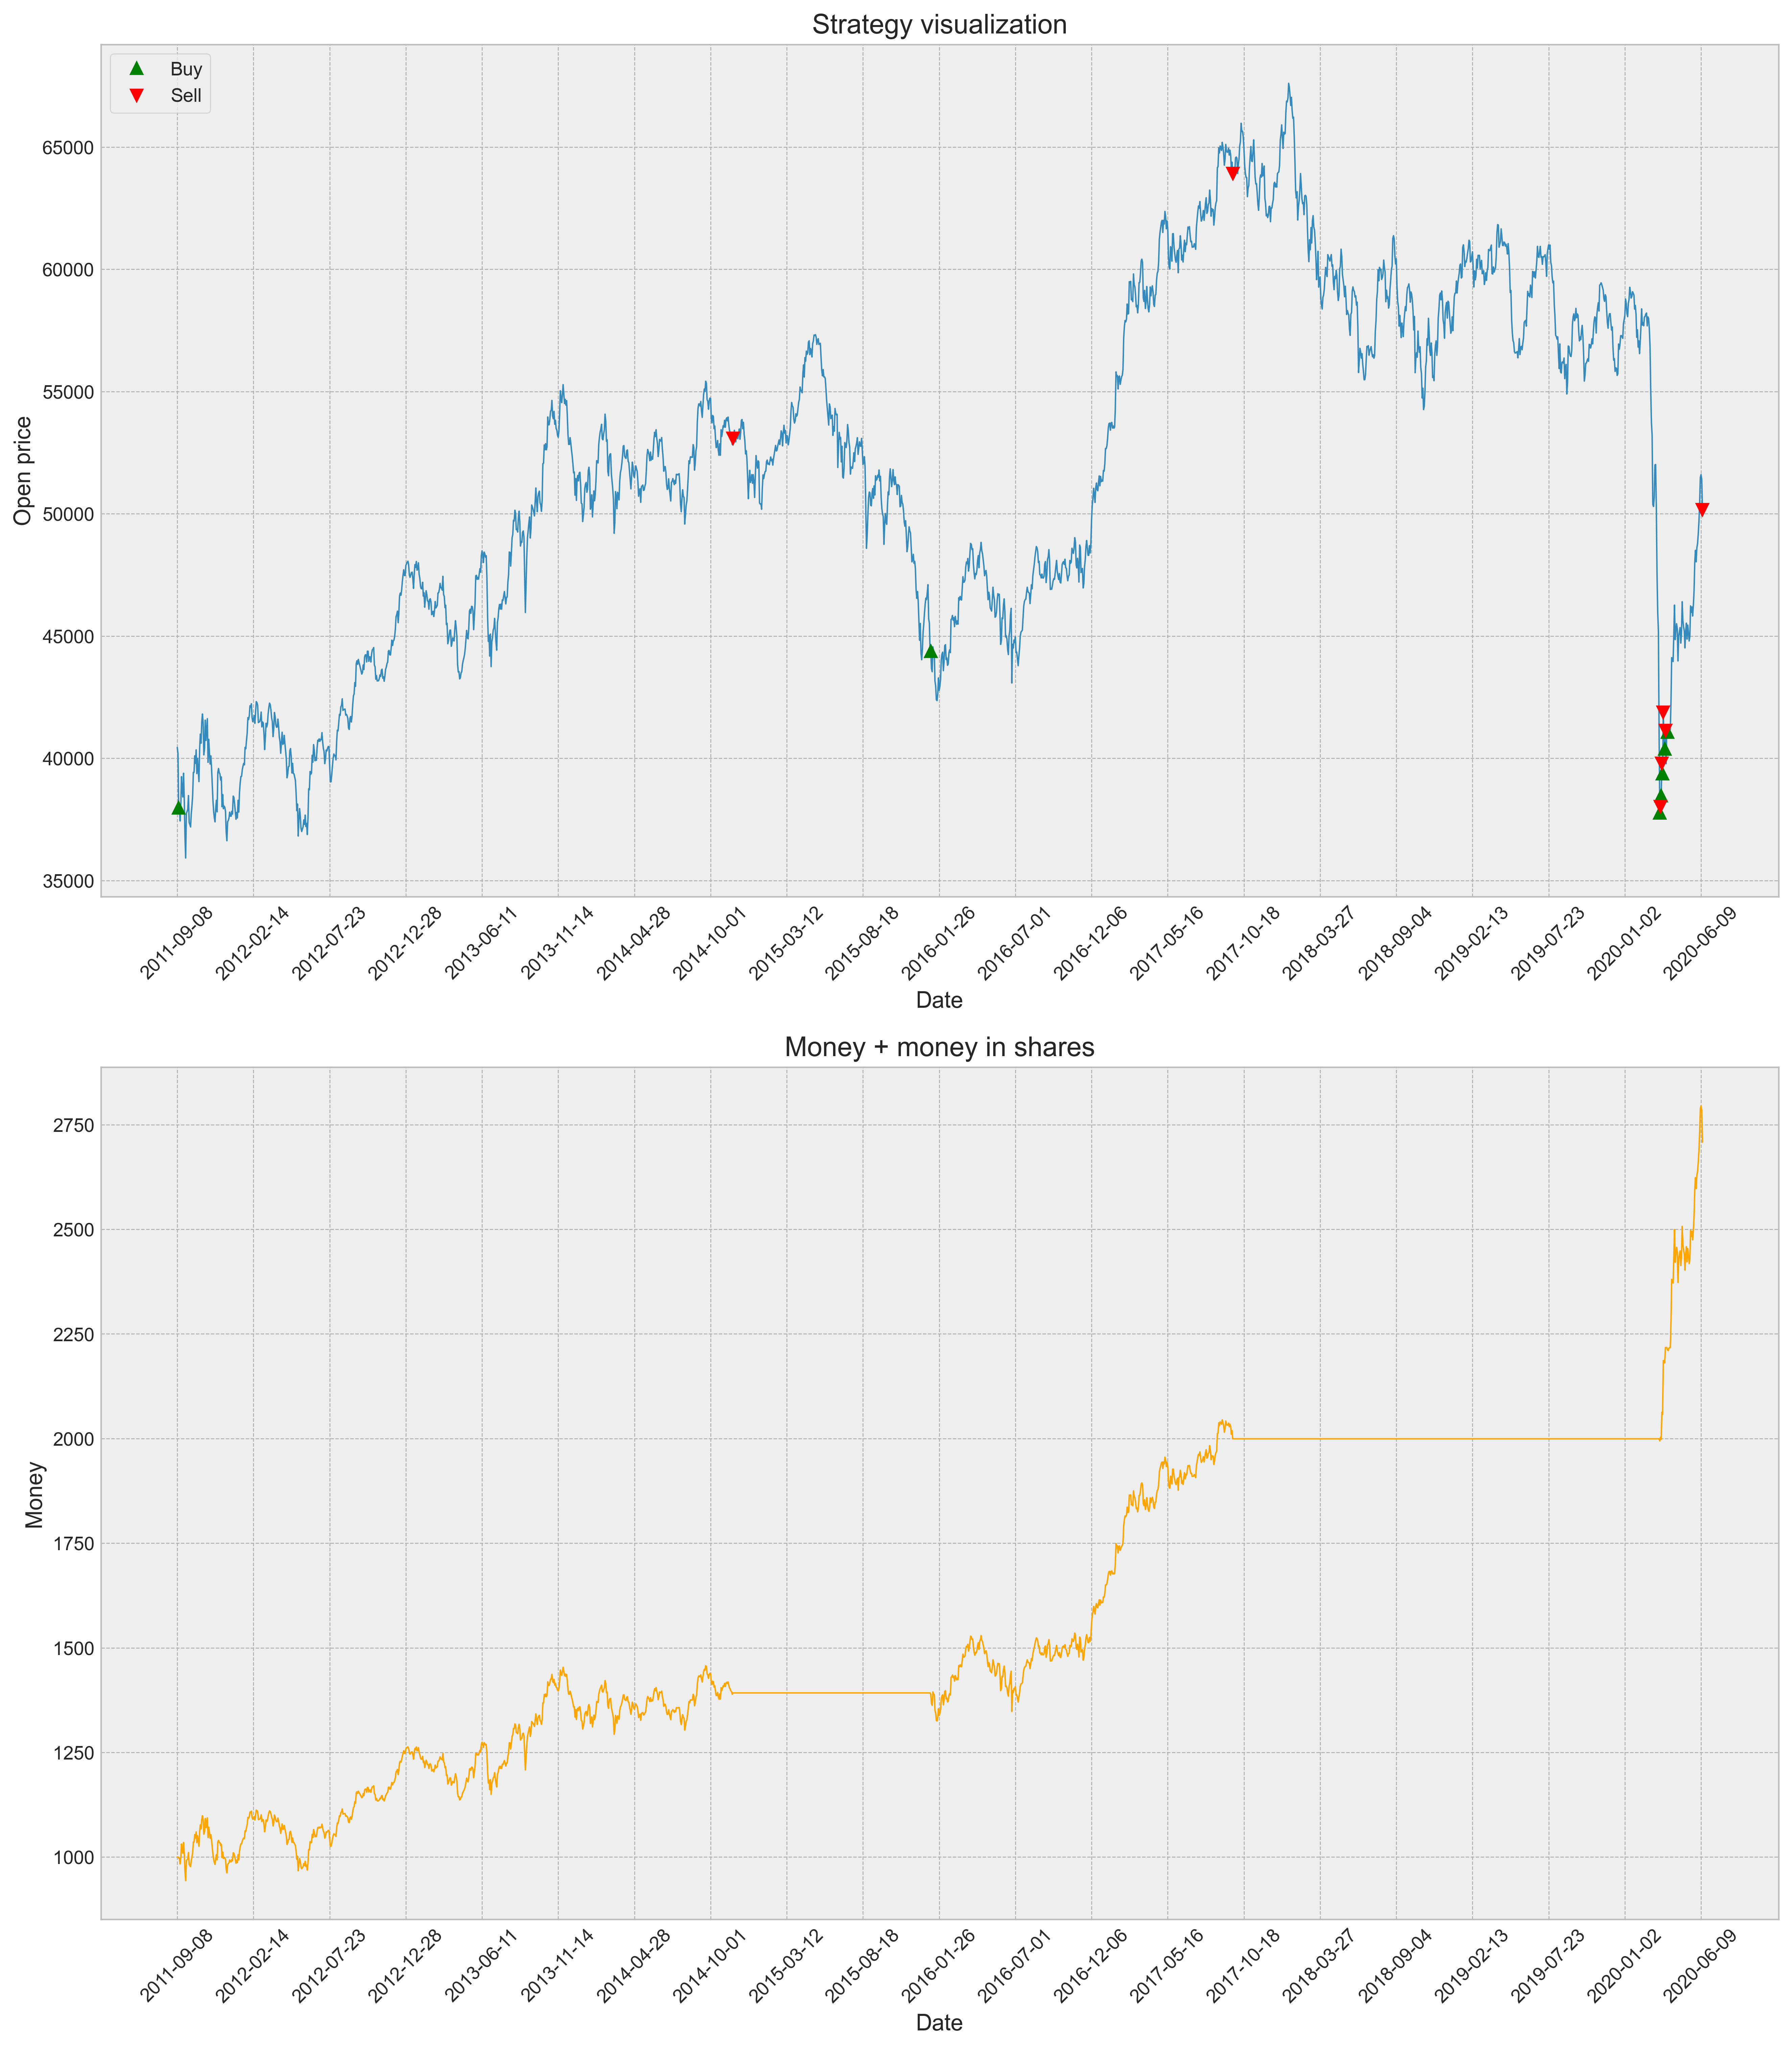

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(stock_data, ta_features, best_strategy)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_strategy_final_money = sum_money_and_money_in_shares[-1]

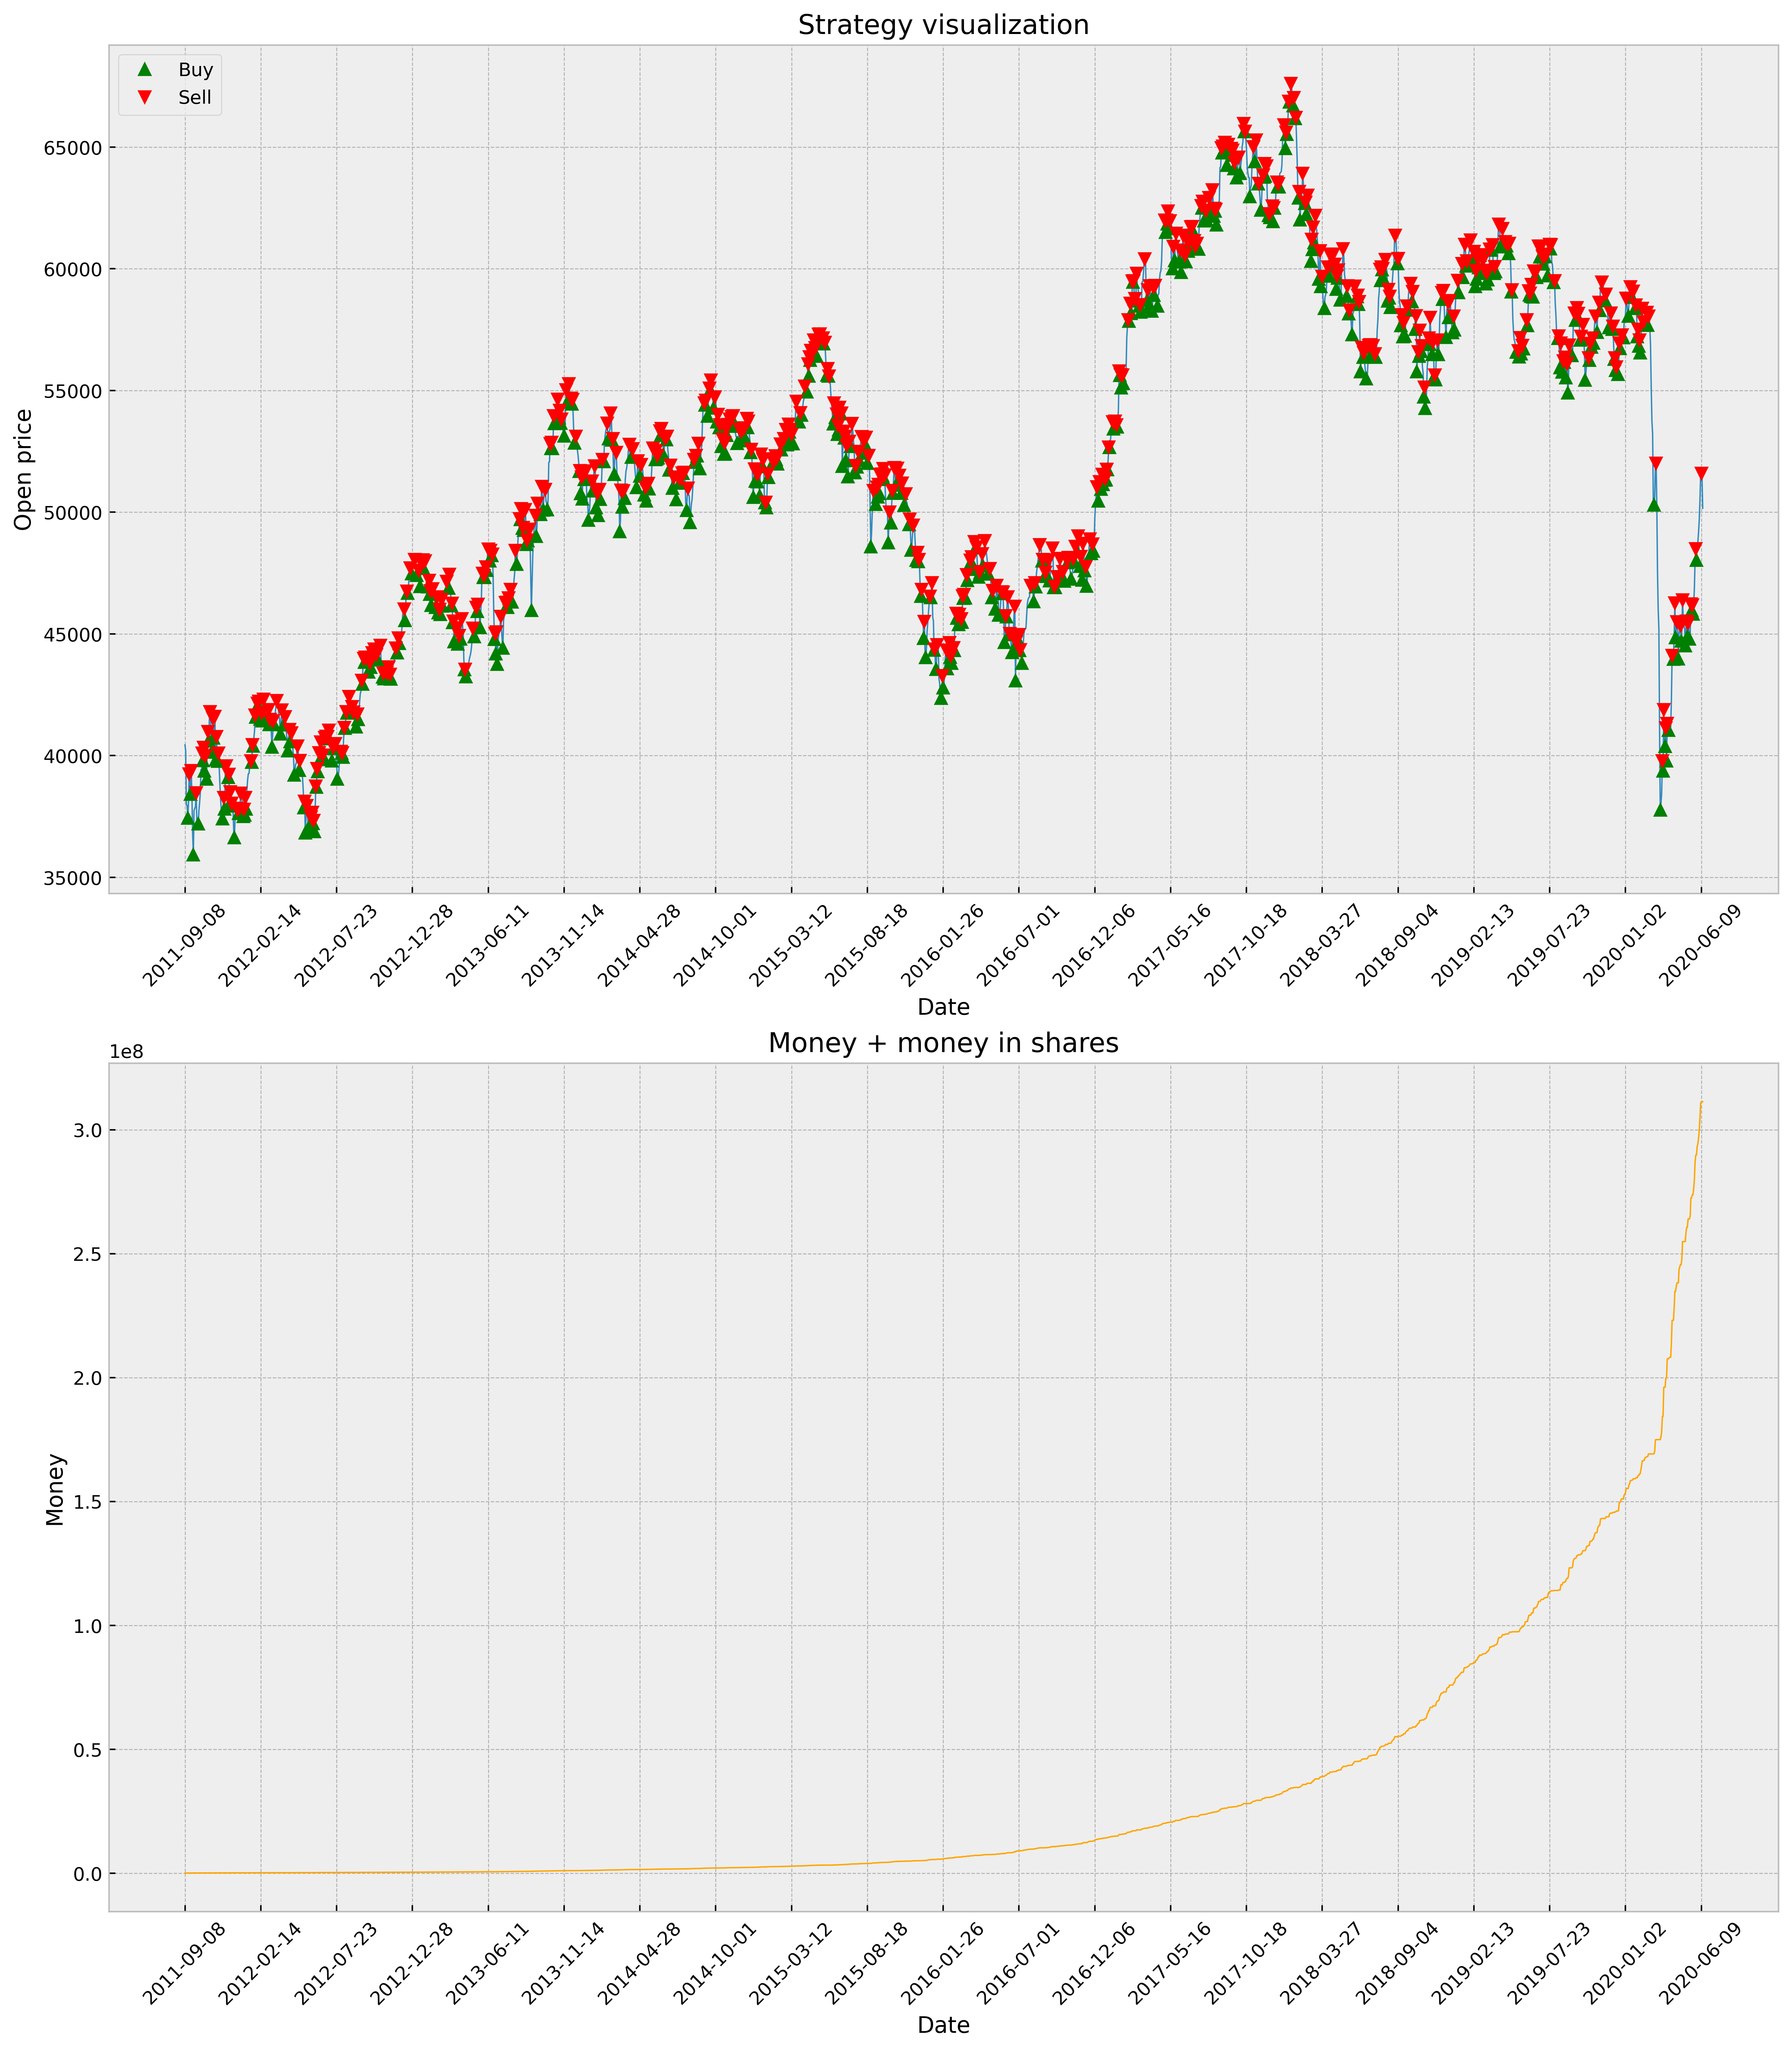

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_best_possible_strategy(stock_data)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_possible_strategy_final_money = sum_money_and_money_in_shares[-1]

In [10]:
print(f'{best_strategy_final_money / best_possible_strategy_final_money * 100}%')

0.10910997650039496%
